In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
p = Path.cwd().parent / 'data'

In [35]:
first = p / 'CFD_Register_Jan_21_2022.xlsx'
middle = p / 'CFD_Register_Jan_24_2024.xlsx'
second = p / 'CFD_Register_2024-09-10.xlsx'

first = (
    pd.read_excel(first, index_col=0, sheet_name='Register')
    .rename(columns={
        'Current strike price (field_cfd_current_strikeprice)': 'strike_price',
        'Technology type (field_cfd_technology_type)': 'carrier',
        'Unique Identifier (field_cfd_unique_id)': 'cfd_Id',
        'Start Date (field_start_date)': 'start_date',
    })
)

middle = (
    pd.read_excel(middle, index_col=0, sheet_name='Register')
    .rename(columns={
        'Current strike price (field_cfd_current_strikeprice)': 'strike_price',
        'Technology type (field_cfd_technology_type)': 'carrier',
        'Unique Identifier (field_cfd_unique_id)': 'cfd_Id',
        'Start Date (field_start_date)': 'start_date',
    })
)

second = (
    pd.read_excel(second, index_col=0)
    .rename(columns={
        'Current strike price (field_cfd_current_strikeprice)': 'strike_price',
        'Technology type (field_cfd_technology_type)': 'carrier',
        'Unique Identifier (field_cfd_unique_id)': 'cfd_Id',
        'Start Date (field_start_date)': 'start_date',
    })
)

first['start_date'] = pd.to_datetime(first['start_date'], dayfirst=True)
middle['start_date'] = pd.to_datetime(middle['start_date'], dayfirst=True)
second['start_date'] = pd.to_datetime(second['start_date'], dayfirst=True)

inter = pd.Index(first['cfd_Id']).intersection(second['cfd_Id']).intersection(middle['cfd_Id']).dropna()

first.set_index('cfd_Id', inplace=True)
second.set_index('cfd_Id', inplace=True)
middle.set_index('cfd_Id', inplace=True)

In [36]:
# first.loc[inter].head().iloc[:, 5:15]
middle.loc[inter].head().iloc[:, 5:15]

,Dual Scheme Plant (field_cfd_dual_scheme_cfd_unit),Capacity of Whole Station (field_cfd_capacity_whole_station),Initial Installed Capacity Estimate for CFD Unit (field_cfd_init_insta_capaestima),Any Reduction to the Capacity of a CFD Unit (field_cfd_reduction_capacity),Initial Strike Price (field_cfd_strikeprice),strike_price,Reference price,Change to Strike Price (field_cfd_change_strikeprice),Target Commissioning Date (field_cfd_target_comm_date),Target Commissioning Window Start Date (field_cfd_start_date_targcomwin)
cfd_Id,,,,,,,,,,
AAA-ACH-183,No,NaN,10.0,NaN,82.5,110.35,NaN,27.85,31/10/2018,31/10/2018
AAA-BAD-185,No,NaN,29.9,3.56,82.5,108.91,NaN,26.41,31/03/2019,31/03/2019
AAA-BAN-189,No,NaN,104.0,16.77,82.5,108.82,NaN,26.32,25/03/2019,01/03/2019
AAA-BAN-190,No,NaN,16.4,4.44,82.5,110.35,NaN,27.85,29/09/2018,01/10/2017
AAA-BAN-192,No,NaN,60.0,9.27,82.5,108.82,NaN,26.32,31/03/2019,01/09/2018


In [37]:
second.loc[inter].head().iloc[:, 5:15]

,Dual Scheme Plant (field_cfd_dual_scheme_cfd_unit),Capacity of Whole Station (field_cfd_capacity_whole_station),Initial Installed Capacity Estimate for CFD Unit (field_cfd_init_insta_capaestima),Any Reduction to the Capacity of a CFD Unit (field_cfd_reduction_capacity),Initial Strike Price (field_cfd_strikeprice),strike_price,Reference price,Change to Strike Price (field_cfd_change_strikeprice),Target Commissioning Date (field_cfd_target_comm_date),Target Commissioning Window Start Date (field_cfd_start_date_targcomwin)
cfd_Id,,,,,,,,,,
AAA-ACH-183,No,NaN,10.0,NaN,82.5,114.80,NaN,32.30,31/10/2018,31/10/2018
AAA-BAD-185,No,NaN,29.9,3.56,82.5,113.59,NaN,31.09,31/03/2019,31/03/2019
AAA-BAN-189,No,NaN,104.0,16.77,82.5,113.47,NaN,30.97,25/03/2019,01/03/2019
AAA-BAN-190,No,NaN,16.4,4.44,82.5,114.80,NaN,32.30,29/09/2018,01/10/2017
AAA-BAN-192,No,NaN,60.0,9.27,82.5,113.47,NaN,30.97,31/03/2019,01/09/2018


In [40]:
locfile = Path.cwd().parent / 'data' / 'bmunits_loc.csv'
bmus = pd.read_csv(locfile, index_col=0)
bmus = bmus.loc[bmus['lat'] != 0]

In [59]:
mapping = pd.read_csv(
    p / 'cfd_registers' / 'cfd_to_bm_unit_mapping.csv',
    index_col=1,
    )
mapping.index = list(map(lambda i: i.split('_')[-1], mapping.index))
mapping = mapping.loc[mapping.index.intersection(bmus.index), 'CFD_Id']

In [60]:
mapping.shape

(40,)

In [62]:
from datetime import datetime

file_dict = {
    "2024-07-03": "CFD_Register_2024-07-03.xlsx",
    "2024-09-10": "CFD_Register_2024-09-10.xlsx",
    "2024-09-18": "CFD_Register_2024-09-18.xlsx",
    "2024-04-03": "CFD_Register_Apr_3_2024.xlsx",
    "2022-04-11": "CFD_Register_April_11_2022.xlsx",
    "2022-12-05": "CFD_Register_Dec_5_2022.xlsx",
    "2021-12-09": "CFD_Register_Dec_9_2021.xlsx",
    "2024-01-02": "CFD_Register_Jan_2_2024.xlsx",
    "2022-01-21": "CFD_Register_Jan_21_2022.xlsx",
    "2024-01-24": "CFD_Register_Jan_24_2024.xlsx",
    "2022-07-05": "CFD_Register_July_5_2022.xlsx",
    "2023-06-30": "CFD_Register_Jun_30_2023.xlsx",
    "2023-03-29": "CFD_Register_Mar_29_2023.xlsx",
    "2022-09-27": "CFD_Register_Sep_27_2022.xlsx",
    "2023-09-29": "CFD_Register_Sep_29_2023.xlsx"
}

sorted_file_dict = dict(
    sorted(
        file_dict.items(),
        key=lambda x: datetime.strptime(x[0], "%Y-%m-%d")
        )
    )

In [87]:
from pprint import pprint

pprint(list(sorted_file_dict))

['2021-12-09',
 '2022-01-21',
 '2022-04-11',
 '2022-07-05',
 '2022-09-27',
 '2022-12-05',
 '2023-03-29',
 '2023-06-30',
 '2023-09-29',
 '2024-01-02',
 '2024-01-24',
 '2024-04-03',
 '2024-07-03',
 '2024-09-10',
 '2024-09-18']


In [75]:
def process_xlsx_file(file_path, mapping):
    try:
        df = pd.read_excel(file_path, index_col=0, sheet_name='Register')
    except Exception as e:
        print(f"Failed to read with pd.read_excel: {e}")
        try:
            df = pd.read_excel(file_path, index_col=0, sheet_name='Register', engine='openpyxl')
        except Exception as e:
            print(f"Failed to read with openpyxl: {e}")
            return None, None

    df = df.rename(columns={
        'Current strike price (field_cfd_current_strikeprice)': 'strike_price',
        'Unique Identifier (field_cfd_unique_id)': 'cfd_Id',
    })

    df.set_index('cfd_Id', inplace=True)

    current_mapping = pd.DataFrame(mapping.copy())
    current_mapping['strike_price'] = (
        current_mapping['CFD_Id']
        .apply(lambda x: df.loc[x, 'strike_price'])
    )

    return current_mapping.loc[
        ~current_mapping.index.duplicated(keep='first'),
        'strike_price'
        ]

strike_prices = []

for date, file_name in sorted_file_dict.items():

    strike_prices.append(
        process_xlsx_file(
            p / 'cfd_registers' / file_name,
            mapping
            ).rename(date)
        )


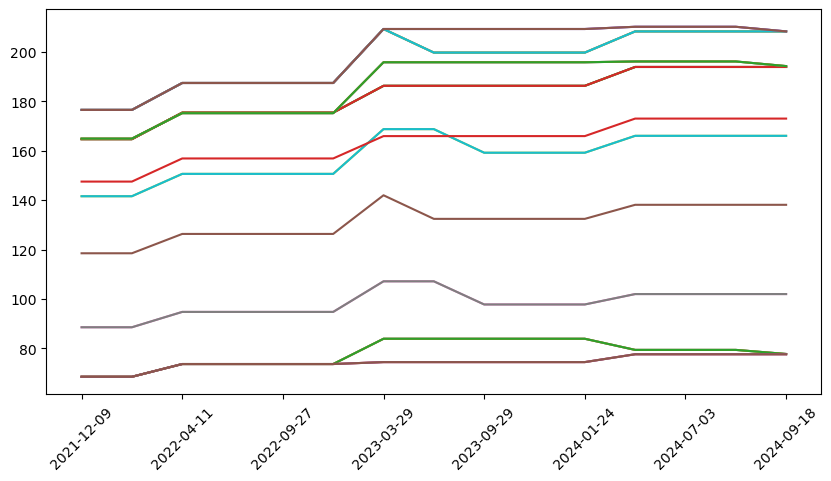

In [86]:
fig, ax = plt.subplots(figsize=(10, 5))
pd.concat(strike_prices, axis=1).T.plot(legend=False, ax=ax)
plt.xticks(rotation=45)
plt.show()
